# Chapter 4: ODEs
Example code from Chapter 4

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def FreeFall(state , time):
    """This function defines the ODE dˆ2x/dtˆ2 =  g.
    It takes the vector y and returns another vector containing the 
    derivatives of each element in the current state of the system.
    The first element in state is position x, and the derivative of x 
    is velocity , v. So the first element in the return vector is v, 
    which is the second element in state .
    The second element in state is v, and the derivative of v is  g 
    for free fall . The result is returned as a numpy array so the 
    rest of the program can do vector math."""
    g0 = state[1]
    g1 =  9.8
    return array([g0, g1])

In [3]:
def euler(y, t, dt, derivs):
    """A routine that impliments Euler ’s method of finding the new ’state’ 
    of y, given the current state, time, and desired time step . ’ derivs ’ 
    must be a function that returns the derivatives of y and thus defines 
    the differential equation."""    
    y_next = y + derivs(y,t) * dt 
    return y_next

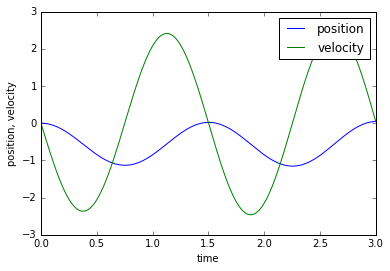

In [11]:
N = 1000
xo = 0.0
vo = 0.0
tau = 3.0

dt = tau/float(N-1)

k = 3.5
m = 0.2

gravity = 9.8

# Euler ’s method for ODE’s , written earlier
# number of steps to take # initial position , spring # unstretched.
# initial velocity
# total time for the
# simulation , in seconds . # time step
# spring constant , in N/m # mass, in kg
# g, in m/sˆ2
# Since we’re plotting vs t , we need time for that plot .

time = linspace(0, tau, N)


"""Create a Nx2 array for storing the results of our calculations. 
Each 2 element row will be used for the state of the system at one 
instant , and each instant is separated by time dt. The first element 
in each row will be position, the second velocity."""
y = zeros([N,2]) # the state vector
y[0,0] = xo
y[0,1] = vo

def SHO(state, time):
    """This defines the differential equation we’re solving: 
    dxˆ2/dt= -k/m x - g.
    We break this second order DE into two first  order DE’s 
    by introducing v:
    dx/dt = v
    dv/dt = k/m x - g
    """
    g0 = state[1]
    g1 =  -k/m * state [0] - gravity
    return array([g0, g1])

# Now we do the calculations.
# Loop only to N 1 so that we don’t run into a # problem addressing y[N+1] 
# on the last point.
for j in range(N-1):
    # We give the euler routine the current state # y[j], the time 
    # (which we don’t care about at all in this ODE) the time step dt, and 
    # the derivatives function SHO().
    y[j+1] = euler(y[j], time[j], dt, SHO)

    # That’s it for calculations! Now graph the results .
    # start by pulling out what we need from y.

    xdata = [y[j,0] for j in range(N)] 
    vdata = [y[j,1] for j in range(N)]
plot(time, xdata, label="position")
plot(time, vdata, label="velocity")
xlabel ("time")
ylabel("position, velocity")
legend()

## Questions:
 * Why does the spring oscillate even if velocity and position are both zero initially?
 * How does this look after long time?
 * Are there other (simpler) ways to plot the portion of the y vector that we want? (Hint: array slicing)